<a href="https://colab.research.google.com/github/adenikeadewumi/ML-Projects/blob/main/british_airway_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df= pd.read_csv("/content/customer_booking (1).csv", encoding="ISO-8859-1")

In [160]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


Plot histogram of each feature

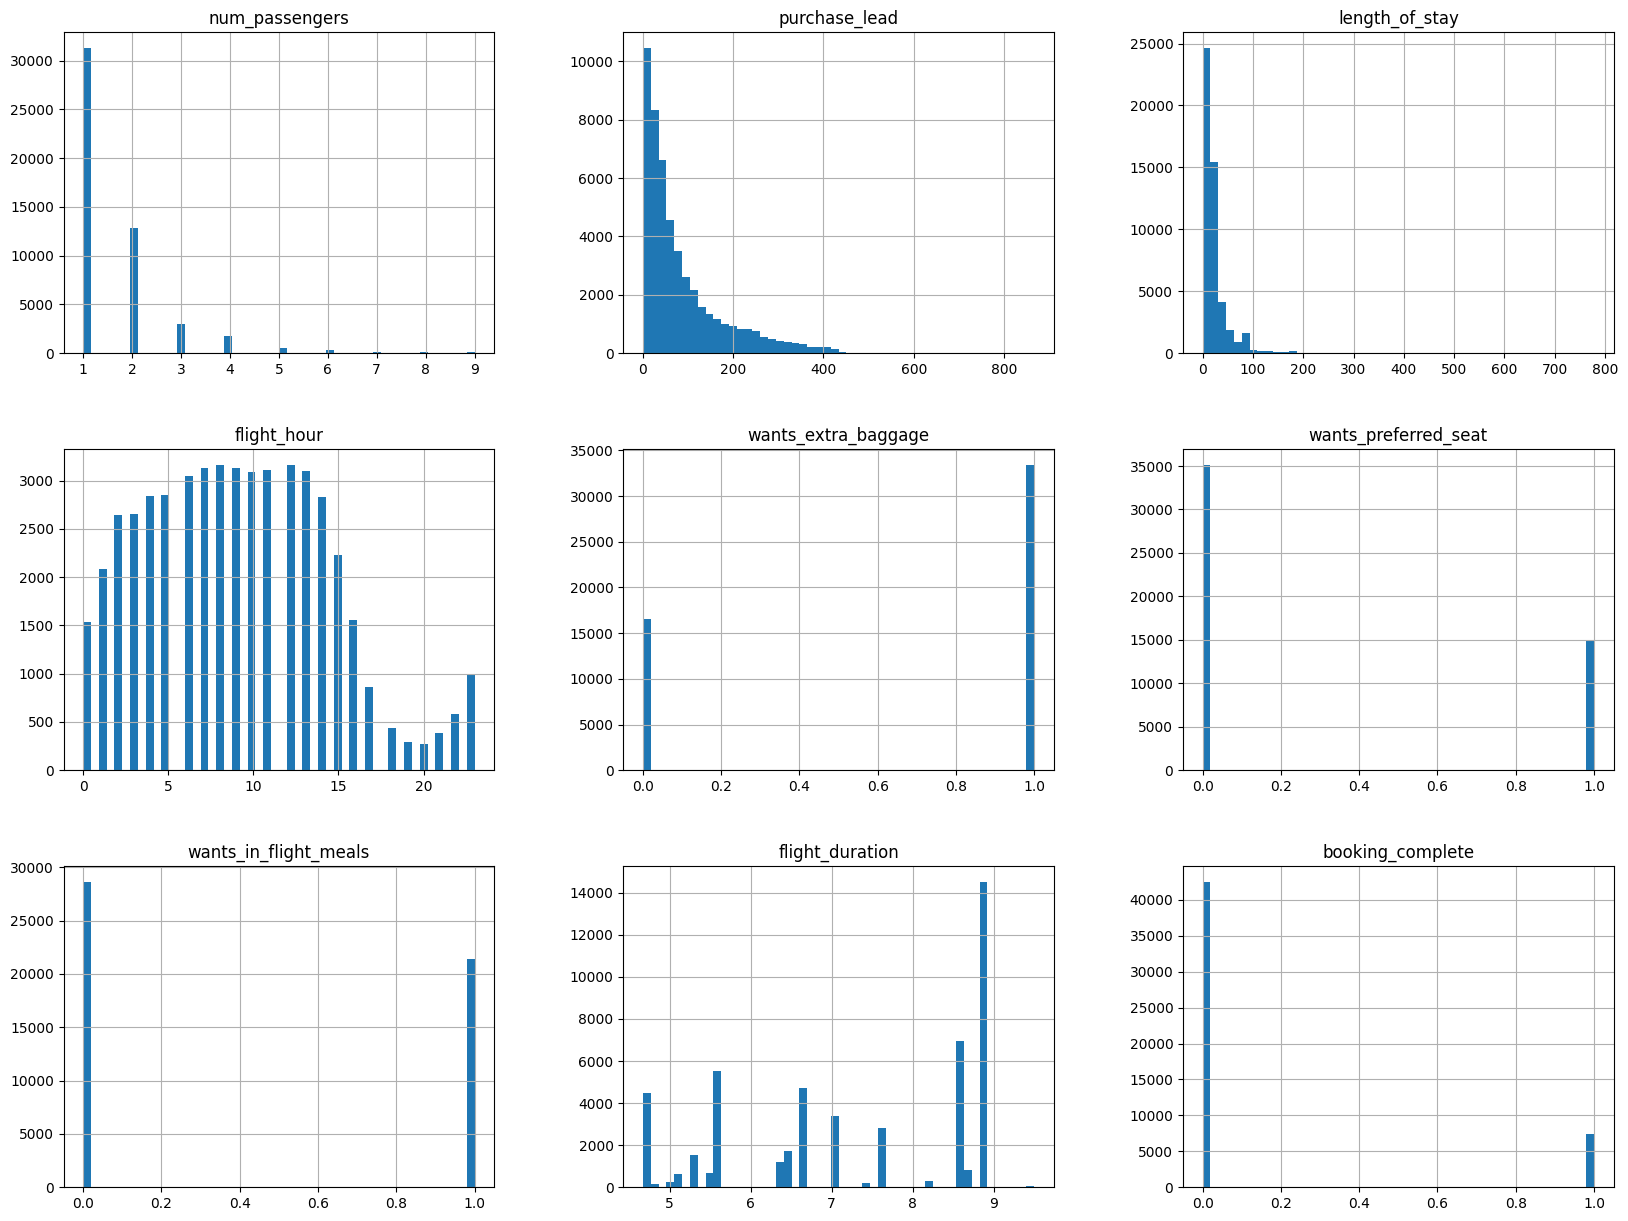

In [161]:
#histogram of features
df.hist(bins=50, figsize=(20,15))
plt.show()

In [162]:
df["sales_channel"].unique()
df["trip_type"].unique()
df["booking_origin"].unique()
df["flight_duration"].unique()

array([5.52, 5.07, 7.57, 6.62, 7.  , 4.75, 8.83, 7.42, 6.42, 5.33, 4.67,
       5.62, 8.58, 8.67, 4.72, 8.15, 6.33, 5.  , 4.83, 9.5 , 5.13])

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [164]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [165]:
df.value_counts()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  flight_hour  flight_day  route   booking_origin  wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  flight_duration  booking_complete
3               Mobile         RoundTrip  37             18              4            Tue         HNDTRZ  Japan           1                    0                     0                      7.57             0                   11
1               Mobile         RoundTrip  199            6               18           Mon         IKASZX  China           0                    0                     0                      8.15             0                    9
2               Mobile         RoundTrip  29             6               6            Thu         DPSPVG  China           1                    1                     1                      5.33             0                    8
1               Mobile         RoundTrip  98             36              13           Mon         DMKSYD  Australia       1                    1                     1                      8.58             0                    8
2               Internet       RoundTrip  75             6               7            Wed         LOPPVG  China           1                    0                     0                      5.33             0                    7
                                                                                                                                                                                                                                 ..
1               Internet       RoundTrip  54             5               4            Sat         PEKPEN  Malaysia        1                    0                     0                      6.42             0                    1
                                                                         5            Sat         CGKPEK  Indonesia       0                    0                     0                      6.42             0                    1
                                                                                                  MELTPE  Taiwan          0                    1                     1                      8.83             0                    1
                                                                         6            Fri         MELTPE  Taiwan          1                    1                     1                      8.83             0                    1
                                                         4               3            Sat         PENPER  Australia       1                    1                     1                      5.62             0                    1
Name: count, Length: 49281, dtype: int64

Encode the Textual data

In [166]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

Feature Engineering

In [167]:
df['time_of_day'] = pd.cut(df['flight_hour'],
                           bins=[-1, 5, 11, 17, 23],
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'])


df['lead_x_duration'] = df['purchase_lead'] * df['flight_duration']

df['total_add_ons'] = (df['wants_extra_baggage'] +df['wants_preferred_seat'] + df['wants_in_flight_meals'])

#Take care of skewness
df['purchase_lead_log'] = np.log1p(df['purchase_lead'])
df["length_of_stay_log"]= np.log1p(df["length_of_stay"])




In [168]:
#Encode textual data using labelEncoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["sales_channel"]=le.fit_transform(df["sales_channel"])
df["trip_type"]=le.fit_transform(df["trip_type"])
df["booking_origin"]=le.fit_transform(df["booking_origin"])
df["route"]=le.fit_transform(df["route"])
df["time_of_day"]=le.fit_transform(df["time_of_day"])
df["flight_day"]=le.fit_transform(df["flight_day"])

In [169]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,time_of_day,lead_x_duration,total_add_ons,purchase_lead_log,length_of_stay_log
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0,2,1446.24,1,5.572154,2.995732
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0,3,618.24,0,4.727388,3.044522
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0,0,1341.36,2,5.497168,3.135494
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0,3,529.92,1,4.574711,3.465736
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0,0,375.36,2,4.234107,3.135494


In [170]:
df.corr(numeric_only=True)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,time_of_day,lead_x_duration,total_add_ons,purchase_lead_log,length_of_stay_log
num_passengers,1.000000,-0.002457,0.002261,0.212606,-0.115850,0.015607,-0.002243,-0.048508,0.052341,0.120404,0.028544,0.022943,-0.063169,0.024116,-0.021807,0.190923,0.080757,0.215520,-0.139547
sales_channel,-0.002457,1.000000,0.021237,-0.013399,-0.060352,0.022375,-0.022759,-0.020717,0.026449,-0.054254,0.032943,-0.022235,-0.038629,-0.041060,-0.025654,-0.021763,-0.021401,-0.014256,-0.088636
trip_type,0.002261,0.021237,1.000000,-0.008443,0.006510,-0.002758,-0.000892,-0.008754,0.002355,-0.014078,0.005668,0.011955,-0.039071,0.027021,0.001572,-0.014776,0.001871,-0.013843,0.012683
purchase_lead,0.212606,-0.013399,-0.008443,1.000000,-0.076560,0.035973,-0.031403,-0.107435,0.048180,-0.022207,-0.004499,-0.022653,0.067866,-0.022131,-0.025479,0.968123,-0.023624,0.827720,-0.037186
length_of_stay,-0.115850,-0.060352,0.006510,-0.076560,1.000000,-0.024872,0.002472,0.003427,-0.110355,0.176757,0.032264,0.098828,0.141181,-0.042408,0.036475,-0.045918,0.146270,-0.059764,0.787853
flight_hour,0.015607,0.022375,-0.002758,0.035973,-0.024872,1.000000,0.009192,-0.016735,0.042426,-0.011434,0.012171,0.013014,-0.002101,0.007127,-0.826460,0.032727,0.006592,0.052249,-0.040865
flight_day,-0.002243,-0.022759,-0.000892,-0.031403,0.002472,0.009192,1.000000,0.003176,0.000476,0.005714,-0.005376,-0.005199,-0.001757,0.010929,-0.009080,-0.029868,-0.002330,-0.027246,-0.003782
route,-0.048508,-0.020717,-0.008754,-0.107435,0.003427,-0.016735,0.003176,1.000000,-0.067710,0.026334,0.016270,-0.011232,-0.137320,-0.008488,0.003024,-0.132859,0.014218,-0.097674,0.003827
booking_origin,0.052341,0.026449,0.002355,0.048180,-0.110355,0.042426,0.000476,-0.067710,1.000000,-0.028995,-0.050763,-0.084314,-0.230364,0.130804,-0.072585,0.008734,-0.078254,0.030708,-0.243329
wants_extra_baggage,0.120404,-0.054254,-0.014078,-0.022207,0.176757,-0.011434,0.005714,0.026334,-0.028995,1.000000,0.207669,0.216470,0.057054,0.068139,0.008938,-0.009227,0.670103,0.023989,0.274825


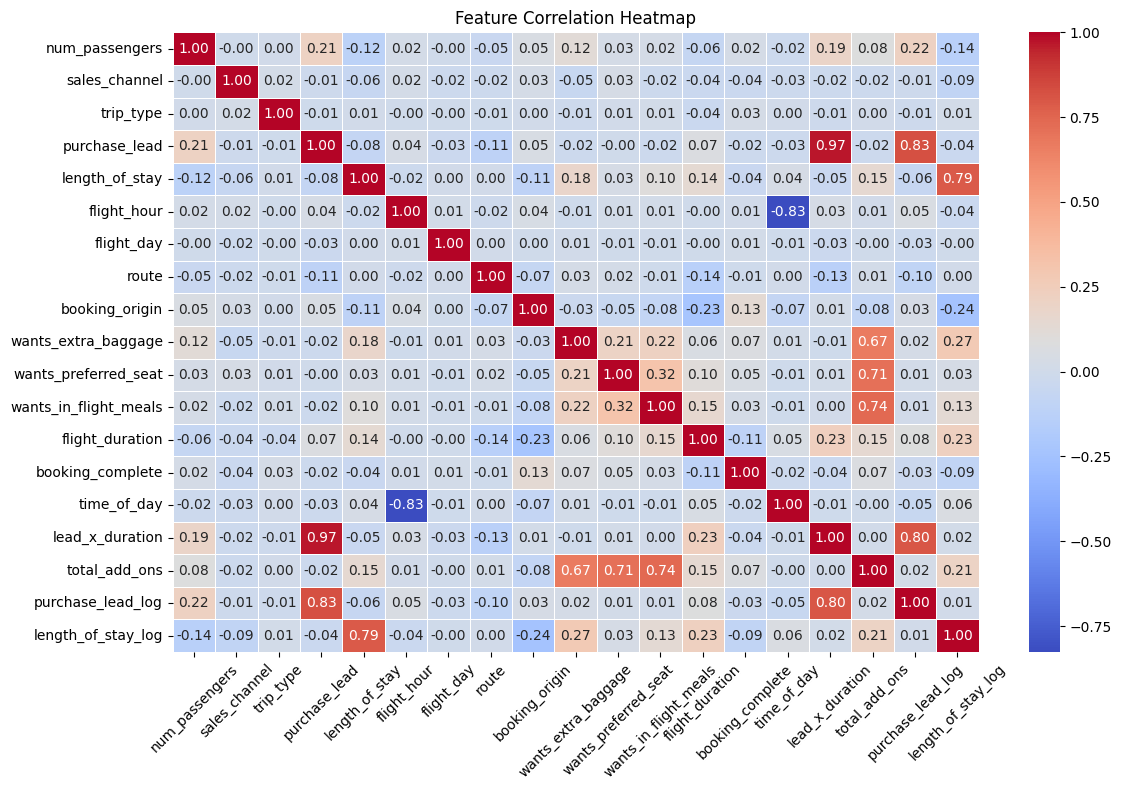

In [171]:
#Create heatmap
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr(numeric_only=True)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Train Model

In [172]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('booking_complete', axis=1), df['booking_complete'], test_size=0.3, random_state=42)

In [173]:
#Create xgboost model
from xgboost import XGBClassifier, plot_importance
model= XGBClassifier( eval_metric='logloss')
model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Predict and  evalaute model

In [174]:
y_pred= model.predict(x_test)
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.85


In [175]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Output the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.8500
Precision: 0.4693
Recall: 0.1173
F1-Score: 0.1877
Confusion Matrix:
[[12490   294]
 [ 1956   260]]


Check the confusion matrix and feature importance

<Figure size 2000x2000 with 0 Axes>

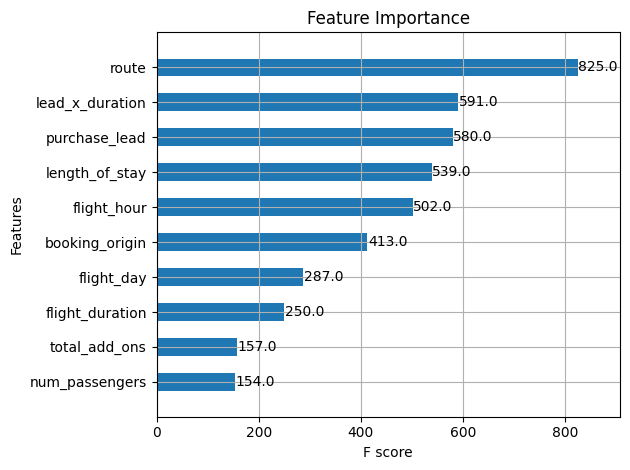

In [176]:
# Plot feature importance
plt.figure(figsize=(20, 20))
plot_importance(model, max_num_features=10, importance_type='weight', title="Feature Importance", height=0.5)
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig('feature_importance.png')

# Show the plot
plt.show()



In [177]:
# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[12490   294]
 [ 1956   260]]


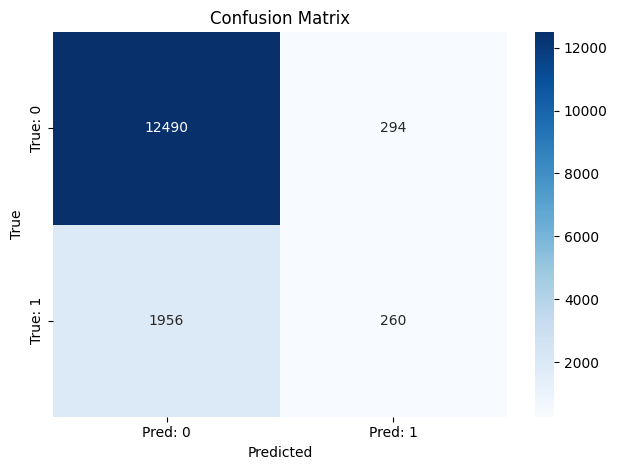

In [178]:
# Plot the confusion matrix using Seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig('confusion_matrix.png')

plt.show()


In [179]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Define the model
model = XGBClassifier()

# Perform Stratified K-Folds cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model using accuracy
scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')

# Output cross-validation results
print(f"Cross-validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")


Cross-validation Accuracy: 0.8449 (+/- 0.0019)


In [180]:
#pip install library

!pip install python-pptx

Present model's summary

In [181]:
from pptx import Presentation

# Create a PowerPoint presentation object
prs = Presentation()

# Add a slide with a title layout
slide_layout = prs.slide_layouts[0]  # Title slide
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

# Set the title and subtitle text
title.text = "Model Performance Summary"
subtitle.text = "Evaluation of XGBoost Model on Booking Prediction"

# Add another slide for the metrics
slide_layout = prs.slide_layouts[1]  # Content slide
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Evaluation Metrics"

# Add bullet points with metrics
content = slide.shapes.placeholders[1]
content.text = f"Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-Score: {f1:.4f}"

# Add another slide for feature importance
slide_layout = prs.slide_layouts[1]  # Content slide
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Feature Importance"
#Add image to slide
slide.shapes.add_picture("feature_importance.png", 0, 0, width=prs.slide_width, height=prs.slide_height)



# Add another slide for confusion matrix
slide_layout = prs.slide_layouts[1]  # Content slide
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Confusion Matrix"
# Add image to slide
slide.shapes.add_picture("/content/confusion_matrix.png", 0, 0, width=prs.slide_width, height=prs.slide_height)

# Save the presentation
prs.save("/content/model_performance_summary.pptx")
